# Citrus Leaves Classification Problem Using SGD Optimizer
## Team Salvator Brothers
## Assignment 4-5

**----------------------------------------------------------------------------------------------**

## Importing Libraries

In [39]:
# Imports
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


## Training-Testing-Validation Dataset Splitting

Splitting Given Training Data into Training, Validation Set (3:1 |OR| 75:25)
Selecting Whole Given Validation data as Training Dataset

ie. Data split (Tr:Te:Va - 3:1:1)

In [40]:
from keras.preprocessing.image import ImageDataGenerator as IDG
from sklearn.model_selection import train_test_split

idg_train = IDG(
    rescale=1./ 255,
    rotation_range=180,
    zoom_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.25)

idg_test = IDG(rescale=1./ 255)

ds_train=idg_train.flow_from_directory('../input/citrus-leaves-prepared/citrus_leaves_prepared/train',batch_size=32,shuffle=True,subset='training')
ds_valid=idg_train.flow_from_directory('../input/citrus-leaves-prepared/citrus_leaves_prepared/train',batch_size=8,shuffle=True,subset='validation')


ds_test=idg_test.flow_from_directory('../input/citrus-leaves-prepared/citrus_leaves_prepared/validation',batch_size=1,shuffle=True)

Found 358 images belonging to 4 classes.
Found 117 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


## Model defining

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers as rg
from tensorflow.keras import initializers as it

model = keras.Sequential([

    layers.Conv2D(input_shape=[256,256,3],filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",strides=(2,2),kernel_regularizer=rg.l1_l2(l1=1e-5, l2=1e-4)),
    layers.MaxPool2D(),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",strides=(2,2),kernel_regularizer=rg.l1_l2(l1=1e-5, l2=1e-4)),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(filters=256, kernel_size=(5,5), padding="same", activation="relu",strides=(2,2),kernel_regularizer=rg.l1_l2(l1=1e-5, l2=1e-4)),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    layers.Conv2D(filters=512, kernel_size=(5,5), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(5,5), padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",strides=(2,2),kernel_regularizer=rg.l1_l2(l1=1e-5, l2=1e-4)),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",strides=(2,2),kernel_regularizer=rg.l1_l2(l1=1e-5, l2=1e-4)),
    layers.BatchNormalization(),

      # Classifier Head
    layers.Flatten(),
    layers.Dense(units=5000, activation="relu"),
    layers.Dropout(0.15),
    layers.Dense(units=2500, activation="relu"),
    layers.Dropout(0.20),
    layers.Dense(units=500, activation="relu"),
    layers.Dense(units=196, activation="sigmoid")
])
model.summary()

## Model Training and fitting
Used SGD (Stochastic Gradient Decent) as optimizer,
Categorical Cross Entropy as Loss

Hyper Parameters
* Learning Rate - 0.01
* Momentum - 0.2

In [42]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2,momentum=0.2),
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision','Recall']
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=35
 )

Epoch 1/35
12/12 [==============================] - 9s 707ms/step - loss: 1.3708 - accuracy: 0.2871 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3304 - val_accuracy: 0.2991 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/35
12/12 [==============================] - 8s 662ms/step - loss: 1.3379 - accuracy: 0.3355 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3040 - val_accuracy: 0.2991 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/35
12/12 [==============================] - 8s 745ms/step - loss: 1.3105 - accuracy: 0.3370 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3070 - val_accuracy: 0.3846 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/35
12/12 [==============================] - 8s 659ms/step - loss: 1.3083 - accuracy: 0.3857 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3043 - val_accuracy: 0.3419 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/35
12/12 [======================

## Plotting the Graphs for Loss, Accuracy, Precision, Recall

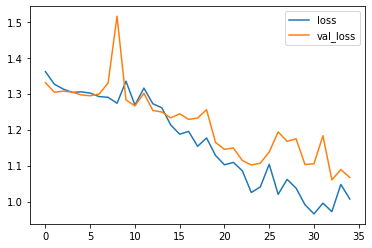

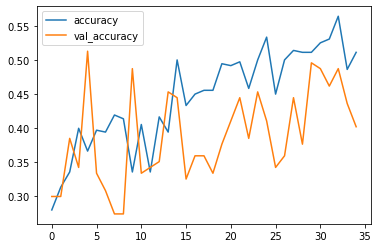

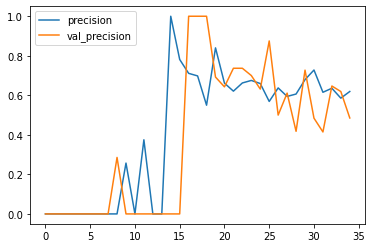

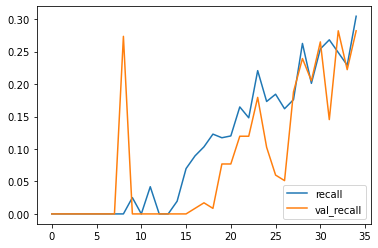

In [43]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
history_frame.loc[:, ['precision', 'val_precision']].plot();
history_frame.loc[:, ['recall', 'val_recall']].plot();

## Evaluating the Model using the Training Data

**Output**

* **loss:** 0.9554
* **accuracy:** 0.4832 
* **precision:** 0.6321 
* **recall:** 0.3408

In [44]:
model.evaluate(ds_train)

12/12 [==============================] - 6s 497ms/step - loss: 0.9554 - accuracy: 0.4832 - precision: 0.6321 - recall: 0.3408


[0.9554155468940735,
 0.4832402169704437,
 0.6321243643760681,
 0.34078213572502136]